# Lab 01: MLP - Exercise

# Understanding the training loop

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
data_path="/Users/dongdongdongdong/Desktop/data/"

train_data = torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')

In [4]:
train_data.shape

torch.Size([60000, 28, 28])

In [5]:
train_label.shape

torch.Size([60000])

In [6]:
test_data.shape

torch.Size([10000, 28, 28])

### Make a ONE layer net class. The network output are the scores! No softmax needed! You have only one line to write in the forward function

In [7]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [8]:
net = one_layer_net(28*28, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer. Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01

In [10]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(net.parameters() , lr=0.01)

bs=50

### Complete the training loop

In [11]:
for iter in range(1, 5000):
    
    optimizer.zero_grad()
    
    indices = torch.LongTensor(bs).random_(0, 60000)
    minibatch_data = train_data[indices]
    minibatch_labels = train_label[indices]
    
    inputs = minibatch_data.view(bs, 28*28)
    inputs.requires_grad_()
    
    scores = net(inputs)
    
    loss = criterion(scores, minibatch_labels)
    loss.backward()
    optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

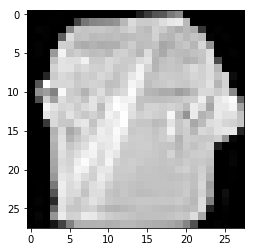

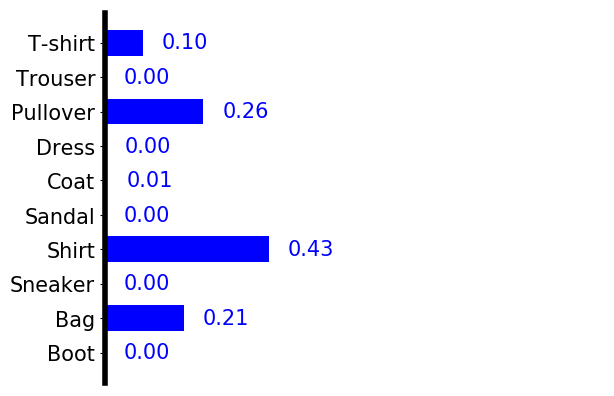

In [12]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1, 784)) 
probs = F.softmax(scores, dim=1)
utils.show_prob_fashion_mnist(probs)